# Iman Kianian - 2nd Assignment of Machine Learning Course - Winter 2022

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics,svm
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


<hr><br>

# Import and preprocessing

#### Import Data

In [3]:
df = pd.read_csv (r'pd_speech_features.csv')
df.columns = df.iloc[0,:]
df = df.iloc[1:,1:]

In [4]:
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,2.97E-06,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,6.50E-06,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,3.87E-06,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,5.24E-06,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [5]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X = X.astype('float')
y = y.astype('int')

In [6]:
X

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
1,1.0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
2,1.0,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
3,1.0,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
4,0.0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
5,0.0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.80903,0.56355,0.28385,417.0,416.0,0.004627,0.000052,0.00064,0.000003,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671
753,0.0,0.16084,0.56499,0.59194,415.0,413.0,0.004550,0.000220,0.00143,0.000006,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170
754,0.0,0.88389,0.72335,0.46815,381.0,380.0,0.005069,0.000103,0.00076,0.000004,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424
755,0.0,0.83782,0.74890,0.49823,340.0,339.0,0.005679,0.000055,0.00092,0.000005,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131


In [7]:
y

1      1
2      1
3      1
4      1
5      1
      ..
752    0
753    0
754    0
755    0
756    0
Name: class, Length: 756, dtype: int32

In [8]:
X = X.to_numpy()
y = y.to_numpy()

#### Split dataset Into Train and test data (90/10)

In [9]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X,y, test_size=0.1,random_state=0)

#### Standardization Data

In [10]:
scaler = StandardScaler()
scaler.fit(X_Train)
X_Train = scaler.transform(X_Train)
X_Test = scaler.transform(X_Test)

#### MinMax

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_Train)
X_Train = scaler.transform(X_Train)
X_Test = scaler.transform(X_Test)

<br><hr><br>

## Section 1

### Decision Tree Classification

#### Training Data

In [12]:
# Create Decision Tree classifer object
dtclf = DecisionTreeClassifier(criterion="entropy",random_state=0)
# Train Decision Tree Classifer
dtclf = dtclf.fit(X_Train,Y_Train)

In [13]:
y_pred = dtclf.predict(X_Train)
#Predict the response for test dataset
print("Accuracy:",metrics.accuracy_score(Y_Train, y_pred))

Accuracy: 1.0


array([[175,   0],
       [  0, 505]], dtype=int64)

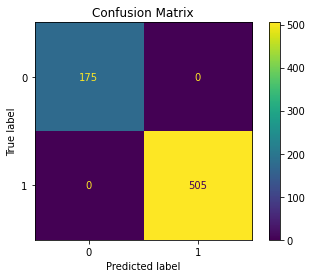

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    dtclf,
    X_Train,
    Y_Train,
    display_labels=[0,1],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [15]:
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



#### Test Data

In [16]:
y_pred = dtclf.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))

Accuracy: 0.7763157894736842


array([[11,  6],
       [11, 48]], dtype=int64)

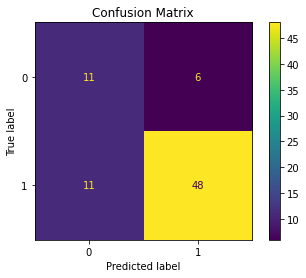

In [17]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    dtclf,
    X_Test,
    Y_Test,
    display_labels=[0,1],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [18]:
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.50      0.65      0.56        17
     Class 1       0.89      0.81      0.85        59

    accuracy                           0.78        76
   macro avg       0.69      0.73      0.71        76
weighted avg       0.80      0.78      0.79        76



#### 5-Fold Cross Validation

In [19]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(dtclf, X_Train, Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.7911764705882353


<hr>

### Random Forest Classification

#### Training Data

In [20]:
rfclf=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)

rfclf = rfclf.fit(X_Train,Y_Train)

In [21]:
y_pred = rfclf.predict(X_Train)
print("Accuracy:",metrics.accuracy_score(Y_Train, y_pred))

Accuracy: 1.0


array([[175,   0],
       [  0, 505]], dtype=int64)

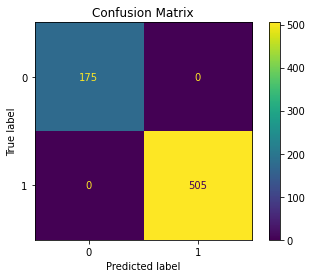

In [22]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    rfclf,
    X_Train,
    Y_Train,
    display_labels=[0,1],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [23]:
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



#### Test Data

In [24]:
y_pred = rfclf.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))

Accuracy: 0.8947368421052632


array([[11,  6],
       [ 2, 57]], dtype=int64)

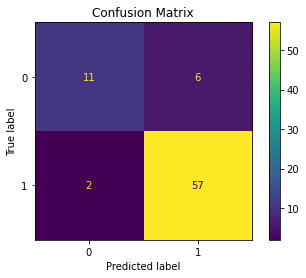

In [25]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    rfclf,
    X_Test,
    Y_Test,
    display_labels=[0,1],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [26]:
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.85      0.65      0.73        17
     Class 1       0.90      0.97      0.93        59

    accuracy                           0.89        76
   macro avg       0.88      0.81      0.83        76
weighted avg       0.89      0.89      0.89        76



#### 5-Fold Cross Validation

In [27]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(rfclf, X_Train, Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.8691176470588236


<hr>

### XGBoost Classification

#### Training Data

In [28]:
xgbclf = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgbclf.fit(X_Train, Y_Train)

[23:17:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred = xgbclf.predict(X_Train)
print("Accuracy:",metrics.accuracy_score(Y_Train, y_pred))

Accuracy: 1.0


array([[175,   0],
       [  0, 505]], dtype=int64)

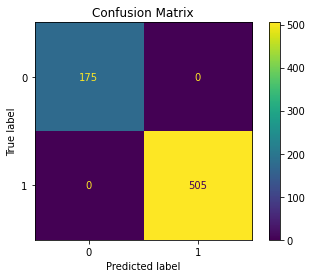

In [30]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    xgbclf,
    X_Train,
    Y_Train,
    display_labels=[0,1],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [31]:
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



#### Test Data

In [32]:
y_pred = xgbclf.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))

Accuracy: 0.9210526315789473


array([[12,  5],
       [ 1, 58]], dtype=int64)

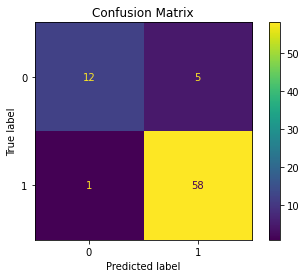

In [33]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    xgbclf,
    X_Test,
    Y_Test,
    display_labels=[0,1],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [34]:
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.92      0.71      0.80        17
     Class 1       0.92      0.98      0.95        59

    accuracy                           0.92        76
   macro avg       0.92      0.84      0.88        76
weighted avg       0.92      0.92      0.92        76



#### 5-Fold-Cross-Validation

In [35]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(xgbclf, X_Train, Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.8823529411764707


<hr>

### SVM Classification

#### Training Data

In [103]:
svmclf = svm.SVC(kernel="linear",random_state=0)
svmclf.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [104]:
y_pred = svmclf.predict(X_Train)
print("Accuracy:",metrics.accuracy_score(Y_Train, y_pred))

Accuracy: 0.9691176470588235


array([[159,  16],
       [  5, 500]], dtype=int64)

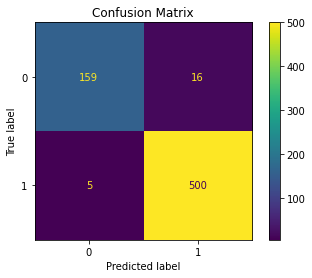

In [105]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    svmclf,
    X_Train,
    Y_Train,
    display_labels=[0,1],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [106]:
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.97      0.91      0.94       175
     Class 1       0.97      0.99      0.98       505

    accuracy                           0.97       680
   macro avg       0.97      0.95      0.96       680
weighted avg       0.97      0.97      0.97       680



#### Test Data

In [107]:
y_pred = svmclf.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))

Accuracy: 0.8947368421052632


array([[14,  3],
       [ 5, 54]], dtype=int64)

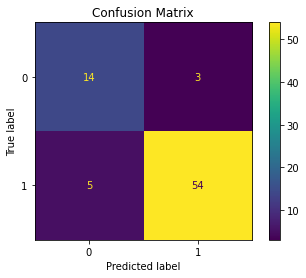

In [108]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    svmclf,
    X_Test,
    Y_Test,
    display_labels=[0,1],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [109]:
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.74      0.82      0.78        17
     Class 1       0.95      0.92      0.93        59

    accuracy                           0.89        76
   macro avg       0.84      0.87      0.85        76
weighted avg       0.90      0.89      0.90        76



#### 5 Fold Cross Validation

In [95]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(svmclf, X_Train, Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.8470588235294118


<br><hr><br>

## Section 2

#### Import New Libraries

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
import math
import tensorflow as tf
import kerastuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from keras.layers import Input, Dense
from keras.models import Model

### MLP Tests - Different situations with (max_iter = 300 , Activation = relu , Solver = adam , alpha = 0.01)

#### Test #1

Accuracy On Training Data  = 0.9264705882352942
Accuracy On Test Data  = 0.9210526315789473


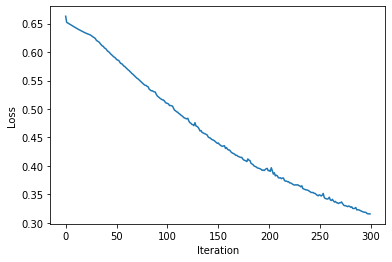

In [296]:
clf = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(X_Train, Y_Train)
print(f'Accuracy On Training Data  = {clf.score(X_Train, Y_Train)}\nAccuracy On Test Data  = {clf.score(X_Test, Y_Test)}')
plt.plot(clf.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [297]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(clf, X_Train, Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.8426470588235293


array([[12,  5],
       [ 1, 58]], dtype=int64)

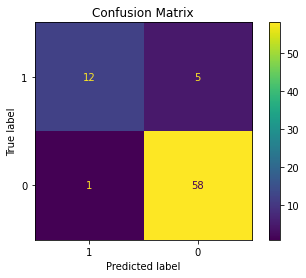

In [298]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    clf,
    X_Test,
    Y_Test,
    display_labels=[1,0],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [299]:
y_pred = clf.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.71      0.83       175
     Class 1       0.91      1.00      0.95       505

    accuracy                           0.93       680
   macro avg       0.95      0.86      0.89       680
weighted avg       0.93      0.93      0.92       680



In [300]:
y_pred = clf.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.92      0.71      0.80        17
     Class 1       0.92      0.98      0.95        59

    accuracy                           0.92        76
   macro avg       0.92      0.84      0.88        76
weighted avg       0.92      0.92      0.92        76



<hr>

#### Test #2 -  Apply PCA to Data

Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.9342105263157895


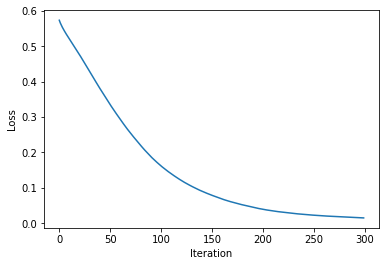

In [328]:
from sklearn.decomposition import PCA
pca = PCA(n_components=70,random_state=0)   # Number of PCs = 70
pca.fit(X_Train)
clf = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(pca.transform(X_Train), Y_Train)
print(f'Accuracy On Training Data  = {clf.score(pca.transform(X_Train), Y_Train)}\nAccuracy On Test Data  = {clf.score(pca.transform(X_Test), Y_Test)}')
plt.plot(clf.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [329]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(clf, pca.transform(X_Train), Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.8705882352941176


array([[14,  3],
       [ 2, 57]], dtype=int64)

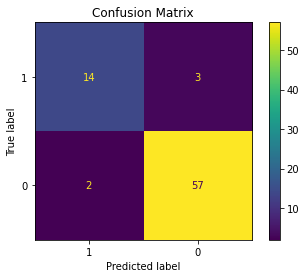

In [289]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    clf,
    pca.transform(X_Test),
    Y_Test,
    display_labels=[1,0],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [290]:
y_pred = clf.predict(pca.transform(X_Train))
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [291]:
y_pred = clf.predict(pca.transform(X_Test))
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.88      0.82      0.85        17
     Class 1       0.95      0.97      0.96        59

    accuracy                           0.93        76
   macro avg       0.91      0.89      0.90        76
weighted avg       0.93      0.93      0.93        76



<hr>

#### Test 3 - PCA and MLP (3,3)

Accuracy On Training Data  = 0.9426470588235294
Accuracy On Test Data  = 0.9473684210526315


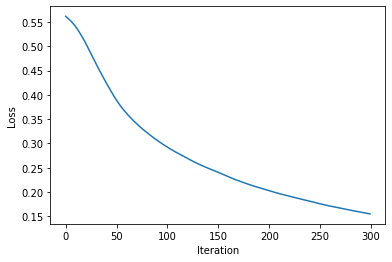

In [346]:
from sklearn.decomposition import PCA
pca = PCA(n_components=70,random_state=0)   # Number of PCs = 70
pca.fit(X_Train)
clf = MLPClassifier(hidden_layer_sizes=(3,3),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(pca.transform(X_Train), Y_Train)
print(f'Accuracy On Training Data  = {clf.score(pca.transform(X_Train), Y_Train)}\nAccuracy On Test Data  = {clf.score(pca.transform(X_Test), Y_Test)}')
plt.plot(clf.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [347]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(clf, pca.transform(X_Train), Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.848529411764706


array([[15,  2],
       [ 2, 57]], dtype=int64)

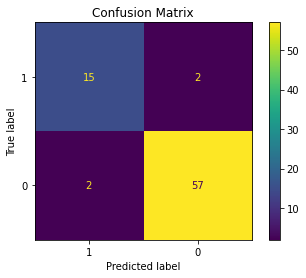

In [348]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    clf,
    pca.transform(X_Test),
    Y_Test,
    display_labels=[1,0],
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

In [340]:
y_pred = clf.predict(pca.transform(X_Train))
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.93      0.84      0.88       175
     Class 1       0.95      0.98      0.96       505

    accuracy                           0.94       680
   macro avg       0.94      0.91      0.92       680
weighted avg       0.94      0.94      0.94       680



In [341]:
y_pred = clf.predict(pca.transform(X_Test))
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88        17
     Class 1       0.97      0.97      0.97        59

    accuracy                           0.95        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.95      0.95      0.95        76



<hr>

#### Test 4 - So bad ( very bad Underfitting)

In [293]:
clf = MLPClassifier(hidden_layer_sizes=(10,2),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(X_Train, Y_Train)
print(f'Accuracy On Training Data  = {clf.score(X_Train, Y_Train)}\nAccuracy On Test Data  = {clf.score(X_Test, Y_Test)}')

Accuracy On Training Data  = 0.7426470588235294
Accuracy On Test Data  = 0.7763157894736842


In [294]:
y_pred = clf.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       175
     Class 1       0.74      1.00      0.85       505

    accuracy                           0.74       680
   macro avg       0.37      0.50      0.43       680
weighted avg       0.55      0.74      0.63       680



In [295]:
y_pred = clf.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        17
     Class 1       0.78      1.00      0.87        59

    accuracy                           0.78        76
   macro avg       0.39      0.50      0.44        76
weighted avg       0.60      0.78      0.68        76



#### Test 5 - Simple Model - good but a bit Underfitting

In [239]:
clf = MLPClassifier(hidden_layer_sizes=(2),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(X_Train, Y_Train)
print(f'Accuracy On Training Data  = {clf.score(X_Train, Y_Train)}\nAccuracy On Test Data  = {clf.score(X_Test, Y_Test)}')

Accuracy On Training Data  = 0.9220588235294118
Accuracy On Test Data  = 0.881578947368421


In [240]:
y_pred = clf.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.92      0.76      0.83       175
     Class 1       0.92      0.98      0.95       505

    accuracy                           0.92       680
   macro avg       0.92      0.87      0.89       680
weighted avg       0.92      0.92      0.92       680



In [241]:
y_pred = clf.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.75      0.71      0.73        17
     Class 1       0.92      0.93      0.92        59

    accuracy                           0.88        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.88      0.88      0.88        76



#### Test 6 - Complex Model - overfitting

In [235]:
clf = MLPClassifier(hidden_layer_sizes=(100),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(X_Train, Y_Train)
print(f'Accuracy On Training Data  = {clf.score(X_Train, Y_Train)}\nAccuracy On Test Data  = {clf.score(X_Test, Y_Test)}')

Accuracy On Training Data  = 0.9632352941176471
Accuracy On Test Data  = 0.8947368421052632


In [236]:
y_pred = clf.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.94      0.91      0.93       175
     Class 1       0.97      0.98      0.98       505

    accuracy                           0.96       680
   macro avg       0.96      0.95      0.95       680
weighted avg       0.96      0.96      0.96       680



In [237]:
y_pred = clf.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.74      0.82      0.78        17
     Class 1       0.95      0.92      0.93        59

    accuracy                           0.89        76
   macro avg       0.84      0.87      0.85        76
weighted avg       0.90      0.89      0.90        76



#### Test 7 - Overfitting

In [247]:
clf = MLPClassifier(hidden_layer_sizes=(20,5),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(X_Train, Y_Train)
print(f'Accuracy On Training Data  = {clf.score(X_Train, Y_Train)}\nAccuracy On Test Data  = {clf.score(X_Test, Y_Test)}')

Accuracy On Training Data  = 0.9382352941176471
Accuracy On Test Data  = 0.881578947368421


In [248]:
y_pred = clf.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.86      0.91      0.88       175
     Class 1       0.97      0.95      0.96       505

    accuracy                           0.94       680
   macro avg       0.91      0.93      0.92       680
weighted avg       0.94      0.94      0.94       680



In [249]:
y_pred = clf.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.70      0.82      0.76        17
     Class 1       0.95      0.90      0.92        59

    accuracy                           0.88        76
   macro avg       0.82      0.86      0.84        76
weighted avg       0.89      0.88      0.88        76



#### Test 8 - Overfitting

In [170]:
clf = MLPClassifier(hidden_layer_sizes=(10,3),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(X_Train, Y_Train)
print(f'Accuracy On Training Data  = {clf.score(X_Train, Y_Train)}\nAccuracy On Test Data  = {clf.score(X_Test, Y_Test)}')

Accuracy On Training Data  = 0.9529411764705882
Accuracy On Test Data  = 0.9078947368421053


In [251]:
y_pred = clf.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.86      0.91      0.88       175
     Class 1       0.97      0.95      0.96       505

    accuracy                           0.94       680
   macro avg       0.91      0.93      0.92       680
weighted avg       0.94      0.94      0.94       680



In [252]:
y_pred = clf.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.70      0.82      0.76        17
     Class 1       0.95      0.90      0.92        59

    accuracy                           0.88        76
   macro avg       0.82      0.86      0.84        76
weighted avg       0.89      0.88      0.88        76



#### Test 9 - Underfitting

In [254]:
clf = MLPClassifier(hidden_layer_sizes=(4,2),max_iter=300,activation = 'relu',solver = 'adam',alpha=0.01,random_state=0).fit(X_Train, Y_Train)
print(f'Accuracy On Training Data  = {clf.score(X_Train, Y_Train)}\nAccuracy On Test Data  = {clf.score(X_Test, Y_Test)}')

Accuracy On Training Data  = 0.9
Accuracy On Test Data  = 0.9078947368421053


In [255]:
y_pred = clf.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.90      0.69      0.78       175
     Class 1       0.90      0.97      0.94       505

    accuracy                           0.90       680
   macro avg       0.90      0.83      0.86       680
weighted avg       0.90      0.90      0.90       680



In [256]:
y_pred = clf.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.81      0.76      0.79        17
     Class 1       0.93      0.95      0.94        59

    accuracy                           0.91        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.91      0.91      0.91        76



### ELM

In [453]:
class ELM():
    def __init__(self,X,Y,hidden_size,random_state=1):
        self.X = X
        self.Y = Y
        self.hidden_size = hidden_size
        onehotencoder = OneHotEncoder()
        self.y = onehotencoder.fit_transform(Y.reshape(-1,1)).toarray()
        self.input_size = self.X.shape[1]
        if random_state==0:
            np.random.seed(0)
        self.input_weights = np.random.normal(size=[self.input_size,self.hidden_size])
        self.biases = np.random.normal(size=[self.hidden_size])
        self.output_weights = np.dot(np.linalg.pinv(self.hidden_nodes(self.X)), self.y)
    def get_params(self):
        return (self.X,self.Y,self.hidden_size)
    def fit(self,X,Y):    
        pass
    def relu(self,x):
        return np.maximum(x, 0, x)
    
    def hidden_nodes(self,X):
        G = np.dot(X, self.input_weights)
        G = G + self.biases
        H = self.relu(G)
        return H
    
    def prediction(self,X):
        out = self.hidden_nodes(X)
        out = np.dot(out, self.output_weights)
        return out
    
    def predict(self,X):
        total = X.shape[0]
        prediction = self.prediction(X)
        pred_list = []
        for i in range(total):
            predicted = np.argmax(prediction[i])
            pred_list.append(predicted)
        return np.array(pred_list)
        
    def accuracy(self,X,Y):
        onehotencoder = OneHotEncoder()
        Y = onehotencoder.fit_transform(Y.reshape(-1,1)).toarray()
        prediction = self.prediction(X)
        correct = 0
        total = X.shape[0]
        pred_list = []
        for i in range(total):
            predicted = np.argmax(prediction[i])
            pred_list.append(predicted)
            actual = np.argmax(Y[i])
            correct += 1 if predicted == actual else 0
        accuracy = correct/total
        return accuracy
    

#### Test #1 - ELM with 80 neurons -- Too few Neurons

In [601]:
elm = ELM(X_Train,Y_Train,80,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(X_Train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(X_Test,Y_Test)}')


Accuracy On Training Data  = 0.8470588235294118
Accuracy On Test Data  = 0.8289473684210527


In [602]:
# Splits dataset into k consecutive folds (without shuffling by default).
accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)   
for train_index, test_index in kfolds.split(X_Train, Y_Train):
    X_train_folds, X_test_folds = X_Train[train_index], X_Train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,80,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.8117647058823529

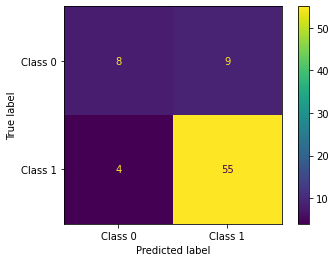

In [603]:
pred_list = elm.predict(X_Test)
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

In [604]:
y_pred = elm.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.80      0.54      0.64       175
     Class 1       0.86      0.95      0.90       505

    accuracy                           0.85       680
   macro avg       0.83      0.75      0.77       680
weighted avg       0.84      0.85      0.84       680



In [605]:
y_pred = elm.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.67      0.47      0.55        17
     Class 1       0.86      0.93      0.89        59

    accuracy                           0.83        76
   macro avg       0.76      0.70      0.72        76
weighted avg       0.82      0.83      0.82        76



#### Test 2  - Overfitting - Too many neurons

In [587]:
elm = ELM(X_Train,Y_Train,1000,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(X_Train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(X_Test,Y_Test)}')

Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.6842105263157895


In [588]:
# Splits dataset into k consecutive folds (without shuffling by default).
accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)   
for train_index, test_index in kfolds.split(X_Train, Y_Train):
    X_train_folds, X_test_folds = X_Train[train_index], X_Train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,1000,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.6779411764705883

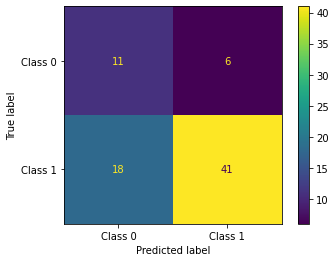

In [589]:
pred_list = elm.predict(X_Test)
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

In [590]:
y_pred = elm.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [591]:
y_pred = elm.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.38      0.65      0.48        17
     Class 1       0.87      0.69      0.77        59

    accuracy                           0.68        76
   macro avg       0.63      0.67      0.63        76
weighted avg       0.76      0.68      0.71        76



#### Test 3 - Good choice - No overfitting - a bit underfitting

In [559]:
elm = ELM(X_Train,Y_Train,210,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(X_Train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(X_Test,Y_Test)}')


Accuracy On Training Data  = 0.9235294117647059
Accuracy On Test Data  = 0.868421052631579


In [560]:
# Splits dataset into k consecutive folds (without shuffling by default).
accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)   
for train_index, test_index in kfolds.split(X_Train, Y_Train):
    X_train_folds, X_test_folds = X_Train[train_index], X_Train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,210,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.8367647058823529

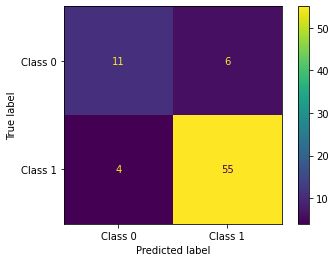

In [561]:
pred_list = elm.predict(X_Test)
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

In [562]:
y_pred = elm.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.91      0.78      0.84       175
     Class 1       0.93      0.97      0.95       505

    accuracy                           0.92       680
   macro avg       0.92      0.88      0.89       680
weighted avg       0.92      0.92      0.92       680



In [563]:
y_pred = elm.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.73      0.65      0.69        17
     Class 1       0.90      0.93      0.92        59

    accuracy                           0.87        76
   macro avg       0.82      0.79      0.80        76
weighted avg       0.86      0.87      0.87        76



#### Test 4 -  good choice - low overfit....????

In [569]:
elm = ELM(X_Train,Y_Train,5000,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(X_Train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(X_Test,Y_Test)}')


Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.8947368421052632


In [570]:
# Splits dataset into k consecutive folds (without shuffling by default).
accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)   
for train_index, test_index in kfolds.split(X_Train, Y_Train):
    X_train_folds, X_test_folds = X_Train[train_index], X_Train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,5000,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.8514705882352942

In [571]:
y_pred = elm.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [572]:
y_pred = elm.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.76      0.76      0.76        17
     Class 1       0.93      0.93      0.93        59

    accuracy                           0.89        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.89      0.89      0.89        76



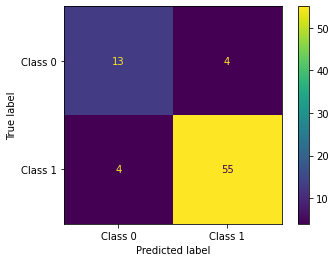

In [573]:
pred_list = elm.predict(X_Test)
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

#### Test 5 - Elm with 10000 neurons

In [578]:
elm = ELM(X_Train,Y_Train,10000,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(X_Train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(X_Test,Y_Test)}')


Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.9342105263157895


In [574]:
# Splits dataset into k consecutive folds (without shuffling by default).
accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)   
for train_index, test_index in kfolds.split(X_Train, Y_Train):
    X_train_folds, X_test_folds = X_Train[train_index], X_Train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,10000,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.8588235294117647

In [579]:
y_pred = elm.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [580]:
y_pred = elm.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.83      0.88      0.86        17
     Class 1       0.97      0.95      0.96        59

    accuracy                           0.93        76
   macro avg       0.90      0.92      0.91        76
weighted avg       0.94      0.93      0.93        76



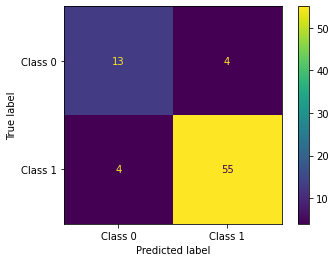

In [577]:
pred_list = elm.predict(X_Test)
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

#### Test 6 -  ELM with 50000 neurons

In [581]:
elm = ELM(X_Train,Y_Train,50000,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(X_Train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(X_Test,Y_Test)}')


Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.9473684210526315


In [583]:
# Splits dataset into k consecutive folds (without shuffling by default).
accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)   
for train_index, test_index in kfolds.split(X_Train, Y_Train):
    X_train_folds, X_test_folds = X_Train[train_index], X_Train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,50000,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.8661764705882353

In [585]:
y_pred = elm.predict(X_Train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [586]:
y_pred = elm.predict(X_Test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.81      1.00      0.89        17
     Class 1       1.00      0.93      0.96        59

    accuracy                           0.95        76
   macro avg       0.90      0.97      0.93        76
weighted avg       0.96      0.95      0.95        76



#### Test 7 - apply PCA to data

In [597]:
pca = PCA(n_components=70,random_state=0)   # Number of PCs = 100
pca.fit(X_Train)
elm = ELM(pca.transform(X_Train),Y_Train,2000,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(pca.transform(X_Train),Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(pca.transform(X_Test),Y_Test)}')

Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.9736842105263158


In [599]:
# Splits dataset into k consecutive folds (without shuffling by default).
accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)

for train_index, test_index in kfolds.split(pca.transform(X_Train), Y_Train):
    X_train_folds, X_test_folds = pca.transform(X_Train)[train_index], pca.transform(X_Train)[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,2000,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.9102941176470587

In [596]:
y_pred = elm.predict(pca.transform(X_Train))
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [598]:
y_pred = elm.predict(pca.transform(X_Test))
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94        17
     Class 1       0.98      0.98      0.98        59

    accuracy                           0.97        76
   macro avg       0.96      0.96      0.96        76
weighted avg       0.97      0.97      0.97        76



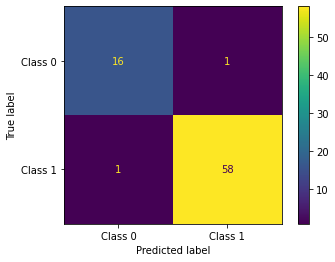

In [600]:
pred_list = elm.predict(pca.transform(X_Test))
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

### Dimensionality Reduction Using AutoEncoder

#### Test 1

In [720]:
ncol = X_Train.shape[1]
### Define the encoder dimension
input_dim = Input(shape = (ncol, ))



encoding_dim = 400
# Encoder Layers
encoded1 = Dense(600, activation = 'relu')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)

# Decoder Layers
decoded1 = Dense(600, activation = 'relu')(encoded2)
decoded2 = Dense(ncol, activation = 'sigmoid')(decoded1)

# Combine Encoder and Deocder layers
autoencoder = Model(input_dim,decoded2)

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'mse')
autoencoder.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 753)]             0         
                                                                 
 dense_105 (Dense)           (None, 600)               452400    
                                                                 
 dense_106 (Dense)           (None, 400)               240400    
                                                                 
 dense_107 (Dense)           (None, 600)               240600    
                                                                 
 dense_108 (Dense)           (None, 753)               452553    
                                                                 
Total params: 1,385,953
Trainable params: 1,385,953
Non-trainable params: 0
_________________________________________________________________


In [721]:
autoencoder.fit(X_Train, X_Train, epochs = 100, batch_size = 32, shuffle = False, validation_data = (X_Test, X_Test))

Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 0.0384 - val_loss: 0.0164
Epoch 2/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0152 - val_loss: 0.0143
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0132 - val_loss: 0.0117
Epoch 4/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 5/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 7/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 8/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 9/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 10/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0061 - val_loss: 0.0068

In [722]:
encoder = Model(input_dim , encoded2)
encoded_input = Input(shape = (encoding_dim, ))
encoded_train = pd.DataFrame(encoder.predict(X_Train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(X_Test))
encoded_test = encoded_test.add_prefix('feature_')
#encoded_train['target'] = Y_Train

In [723]:
encoded_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_390,feature_391,feature_392,feature_393,feature_394,feature_395,feature_396,feature_397,feature_398,feature_399
0,0.0,0.0,0.238906,2.129395,0.000000,0.0,0.319918,0.979786,0.448514,0.0,...,0.0,0.0,0.0,0.0,0.726747,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,1.998780,1.638527,0.0,0.000000,0.000000,2.461142,0.0,...,0.0,0.0,0.0,0.0,0.103323,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.865556,0.263875,0.000000,0.0,0.502774,1.128805,0.082236,0.0,...,0.0,0.0,0.0,0.0,0.705941,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.047969,0.367522,0.000000,0.0,0.146503,0.392930,0.116348,0.0,...,0.0,0.0,0.0,0.0,0.090106,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.618434,1.919748,0.000000,0.0,1.187063,0.838080,0.907250,0.0,...,0.0,0.0,0.0,0.0,0.702305,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.184023,0.000000,0.058868,0.0,...,0.0,0.0,0.0,0.0,0.326278,0.0,0.0,0.0,0.0,0.0
676,0.0,0.0,0.031479,1.479275,0.000000,0.0,0.769857,1.371375,0.458507,0.0,...,0.0,0.0,0.0,0.0,0.326583,0.0,0.0,0.0,0.0,0.0
677,0.0,0.0,0.377215,1.799627,0.000000,0.0,0.000000,0.000000,0.117410,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
678,0.0,0.0,0.278638,2.097063,0.000000,0.0,1.142855,1.657634,0.707468,0.0,...,0.0,0.0,0.0,0.0,0.651815,0.0,0.0,0.0,0.0,0.0


In [724]:
encoded_train = encoded_train.to_numpy()
encoded_test = encoded_test.to_numpy()

In [728]:
elm = ELM(encoded_train,Y_Train,20000,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(encoded_train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(encoded_test,Y_Test)}')


Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.9736842105263158


In [729]:
# Splits dataset into k consecutive folds (without shuffling by default).
accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)

for train_index, test_index in kfolds.split(encoded_train, Y_Train):
    X_train_folds, X_test_folds = encoded_train[train_index], encoded_train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,20000,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.9161764705882351

In [730]:
y_pred = elm.predict(encoded_train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [731]:
y_pred = elm.predict(encoded_test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.88      0.94        17
     Class 1       0.97      1.00      0.98        59

    accuracy                           0.97        76
   macro avg       0.98      0.94      0.96        76
weighted avg       0.97      0.97      0.97        76



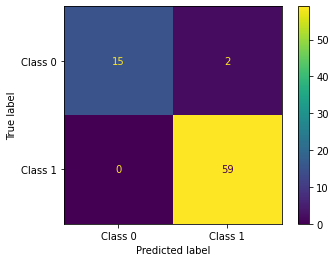

In [732]:
pred_list = elm.predict(encoded_test)
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

#### Test 2 - New AutoEncoder

In [771]:
encoding_dim = 50
# Encoder Layers
encoded1 = Dense(700, activation = 'relu')(input_dim)
encoded2 = Dense(600, activation = 'relu')(encoded1)
encoded3 = Dense(500, activation = 'relu')(encoded2)
encoded4 = Dense(400, activation = 'relu')(encoded3)
encoded5 = Dense(300, activation = 'relu')(encoded4)
encoded6 = Dense(200, activation = 'relu')(encoded5)
encoded7 = Dense(100, activation = 'relu')(encoded6)
encoded8 = Dense(encoding_dim, activation = 'relu')(encoded7)

# Decoder Layers
decoded1 = Dense(100, activation = 'relu')(encoded8)
decoded2 = Dense(200, activation = 'relu')(decoded1)
decoded3 = Dense(300, activation = 'relu')(decoded2)
decoded4 = Dense(400, activation = 'relu')(decoded3)
decoded5 = Dense(500, activation = 'relu')(decoded4)
decoded6 = Dense(600, activation = 'relu')(decoded5)
decoded7 = Dense(700, activation = 'relu')(decoded6)
decoded8 = Dense(ncol, activation = 'sigmoid')(decoded7)

# Combine Encoder and Deocder layers
autoencoder = Model(input_dim,decoded8)

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'mse')
autoencoder.summary()

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 753)]             0         
                                                                 
 dense_184 (Dense)           (None, 700)               527800    
                                                                 
 dense_185 (Dense)           (None, 600)               420600    
                                                                 
 dense_186 (Dense)           (None, 500)               300500    
                                                                 
 dense_187 (Dense)           (None, 400)               200400    
                                                                 
 dense_188 (Dense)           (None, 300)               120300    
                                                                 
 dense_189 (Dense)           (None, 200)               602

In [772]:
autoencoder.fit(X_Train, X_Train, epochs = 100, batch_size = 100, shuffle = False,validation_data = (X_Test, X_Test) )

Epoch 1/100
7/7 [==============================] - 1s 57ms/step - loss: 0.1077 - val_loss: 0.0484
Epoch 2/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0289 - val_loss: 0.0213
Epoch 3/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0180 - val_loss: 0.0167
Epoch 4/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0160 - val_loss: 0.0156
Epoch 5/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 6/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0148 - val_loss: 0.0147
Epoch 7/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0146 - val_loss: 0.0145
Epoch 8/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0145 - val_loss: 0.0143
Epoch 9/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0144 - val_loss: 0.0143
Epoch 10/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 11/100
7/7 [=

Epoch 84/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 85/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0090 - val_loss: 0.0098
Epoch 86/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0089 - val_loss: 0.0096
Epoch 87/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0088 - val_loss: 0.0095
Epoch 88/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0087 - val_loss: 0.0094
Epoch 89/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0088 - val_loss: 0.0092
Epoch 90/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0086 - val_loss: 0.0093
Epoch 91/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0084 - val_loss: 0.0093
Epoch 92/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0085 - val_loss: 0.0091
Epoch 93/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0083 - val_loss: 0.0090
Epoch 94/1

In [773]:
encoder = Model(input_dim , encoded2)
encoded_input = Input(shape = (encoding_dim, ))
encoded_train = pd.DataFrame(encoder.predict(X_Train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(X_Test))
encoded_test = encoded_test.add_prefix('feature_')

In [777]:
elm = ELM(encoded_train,Y_Train,10000,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(encoded_train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(encoded_test,Y_Test)}')


Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.9210526315789473


In [778]:
encoded_train = encoded_train.to_numpy()
encoded_test = encoded_test.to_numpy()
# Splits dataset into k consecutive folds (without shuffling by default).

accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)

for train_index, test_index in kfolds.split(encoded_train, Y_Train):
    X_train_folds, X_test_folds = encoded_train[train_index], encoded_train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,10000,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.8382352941176471

In [779]:
y_pred = elm.predict(encoded_train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [780]:
y_pred = elm.predict(encoded_test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.79      0.88      0.83        17
     Class 1       0.96      0.93      0.95        59

    accuracy                           0.92        76
   macro avg       0.88      0.91      0.89        76
weighted avg       0.93      0.92      0.92        76



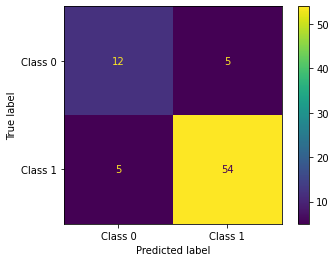

In [750]:
pred_list = elm.predict(encoded_test)
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

#### Test 3

In [781]:
encoding_dim = 200
# Encoder Layers
encoded1 = Dense(500, activation = 'relu')(input_dim)
encoded2 = Dense(300, activation = 'relu')(encoded1)
encoded3 = Dense(encoding_dim, activation = 'relu')(encoded2)

# Decoder Layers
decoded1 = Dense(300, activation = 'relu')(encoded3)
decoded2 = Dense(500, activation = 'relu')(decoded1)
decoded3 = Dense(ncol, activation = 'sigmoid')(decoded2)

# Combine Encoder and Deocder layers
autoencoder = Model(input_dim,decoded3)

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'mse')
autoencoder.summary()

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 753)]             0         
                                                                 
 dense_200 (Dense)           (None, 500)               377000    
                                                                 
 dense_201 (Dense)           (None, 300)               150300    
                                                                 
 dense_202 (Dense)           (None, 200)               60200     
                                                                 
 dense_203 (Dense)           (None, 300)               60300     
                                                                 
 dense_204 (Dense)           (None, 500)               150500    
                                                                 
 dense_205 (Dense)           (None, 753)               377

In [782]:
autoencoder.fit(X_Train, X_Train, epochs = 100, batch_size = 32, shuffle = False, validation_data = (X_Test, X_Test))

Epoch 1/100
22/22 [==============================] - 1s 14ms/step - loss: 0.0426 - val_loss: 0.0164
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0155 - val_loss: 0.0148
Epoch 3/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 4/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0135 - val_loss: 0.0123
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0114 - val_loss: 0.0106
Epoch 6/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 7/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 8/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0084 - val_loss: 0.0088
Epoch 9/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0079 - val_loss: 0.0083
Epoch 10/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 

Epoch 83/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 84/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 85/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 86/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 87/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 88/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 89/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 90/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0023 - val_loss: 0.0050
Epoch 91/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 92/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0051

In [783]:
encoder = Model(input_dim , encoded3)
encoded_input = Input(shape = (encoding_dim, ))
encoded_train = pd.DataFrame(encoder.predict(X_Train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(X_Test))
encoded_test = encoded_test.add_prefix('feature_')

In [784]:
elm = ELM(encoded_train,Y_Train,10000,random_state=0)
print(f'Accuracy On Training Data  = {elm.accuracy(encoded_train,Y_Train)}\nAccuracy On Test Data  = {elm.accuracy(encoded_test,Y_Test)}')


Accuracy On Training Data  = 1.0
Accuracy On Test Data  = 0.9078947368421053


In [785]:
encoded_train = encoded_train.to_numpy()
encoded_test = encoded_test.to_numpy()
# Splits dataset into k consecutive folds (without shuffling by default).

accuracy_list=[]
kfolds = KFold(n_splits=5, random_state=0, shuffle=True)

for train_index, test_index in kfolds.split(encoded_train, Y_Train):
    X_train_folds, X_test_folds = encoded_train[train_index], encoded_train[test_index]
    y_train_folds, y_test_folds = Y_Train[train_index], Y_Train[test_index]
    elmk = ELM(X_train_folds,y_train_folds,10000,random_state=0)
    # put all code in the for loop so that for every set of (X_train_folds, y_train_folds), the model is fitted.
    # call predict() for corresponding set of X_test_folds
    accuracy = elmk.accuracy(X_test_folds,y_test_folds)
    accuracy_list.append(accuracy)
np.mean(accuracy_list)

0.876470588235294

In [786]:
y_pred = elm.predict(encoded_train)
print(metrics.classification_report(Y_Train, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       505

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [787]:
y_pred = elm.predict(encoded_test)
print(metrics.classification_report(Y_Test, y_pred, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.81      0.76      0.79        17
     Class 1       0.93      0.95      0.94        59

    accuracy                           0.91        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.91      0.91      0.91        76



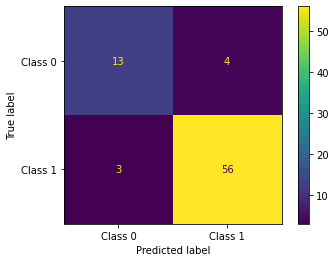

In [788]:
pred_list = elm.predict(encoded_test)
cm = metrics.confusion_matrix(Y_Test, pred_list, labels=[0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0','Class 1'])
disp.plot()
plt.show()

# END.